In [ ]:
!apt-get install tesseract-ocr libtesseract-dev libleptonica-dev pkg-config
!pip install tesserocr

In [96]:
import json
from PIL import Image
from tesserocr import PyTessBaseAPI, RIL
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np
import base64
from io import BytesIO
from PIL import Image
from random import randint

In [117]:
with open("test3.jpeg", "rb") as f:
    im_b64 = base64.b64encode(f.read())

im_bytes = base64.b64decode(im_b64)   # im_bytes is a binary image
im_file = BytesIO(im_bytes)  # convert image to file-like object
image = Image.open(im_file)   # img is now PIL Image object


TEXT EXTRACTED: 

In the above Graph, the set of vertices V = (0,1,2,3,4} and the set of edges E = (01, 12, 23,
34, 04, 14, 13}.

Graphs are used to solve many real-life problems. Graphs are used to represent net-
works. The networks may include paths in a city or telephone network or circuit network
Graphs are also used in social networks like linkedin, Facebook. For example, in
Facebook, each person is represented with a vertex(or node). Each node is a structure
and contains information like person id, name, gender, locale etc.


Image: 


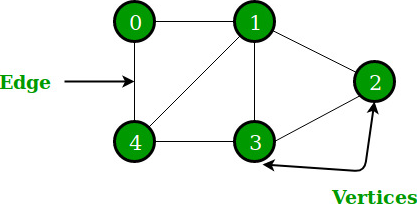

In [118]:
img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
final = img.copy()
resultant_text = ''
with PyTessBaseAPI() as api:
  api.SetImage(image)
  boxes = api.GetComponentImages(RIL.BLOCK, True)
  for i, (im,box,_,_) in enumerate(boxes):
      api.SetRectangle(box['x'],box['y'],box['w'],box['h'])
      conf_mean = api.MeanTextConf()
      if conf_mean >= 80:
          cv2.rectangle(final, (box['x'],box['y']), (box['x']+box['w'],box['y']+box['h']), (255,255,255), -1)
          result = api.GetUTF8Text()
          resultant_text+=result
img_grey = cv2.cvtColor(final, cv2.COLOR_BGR2GRAY)
thresh = 128
img_binary = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)[1]
img_binary = 255*(img_binary < 254).astype(np.uint8) # To invert the text to white
coords = cv2.findNonZero(img_binary) # Find all non-zero points (text)
x, y, w, h = cv2.boundingRect(coords) # Find minimum spanning bounding box
rect = final[y:y+h, x:x+w] # Crop the image - note we do this on the original image

print('TEXT EXTRACTED: \n')
print(resultant_text)

print('')
print('Image: ')
cv2_imshow(rect)